In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

## Exploración Customer Flight Activity 

In [4]:
df_f = pd.read_csv("../data/Customer Flight Activity.csv")

In [5]:
df_f.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


En cuanto al tipo de dato que contiene las columnas, parecen correctas.

In [7]:
df_f.shape

(405624, 10)

In [8]:
df_f.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


- **Flights booked:** Media y mediana, máximos y mínimos alejados. Algo normal, hay personas que pueden no reservar ningún vuelo anualmente y otras que reserven varios, además una misma persona puede encargarse de reservar los vuelos de varias personas a la vez, por lo que subiría esa media.
- **Flights with Companions:** Me llama la atención que el máximo de acompañantes sea tan alto y que la mayoría de personas viajen solas. Puede indicar que las personas que más viajan lo hacen por trabajo (suposición)
- **Total flights:** Media y mediana alejadas. Algo razonable, hay personas que pueden no coger ningún vuelo anualmente y otras que cojan varios. El mínimo, máximo, etc reflejan y confirman esto. 
- **Distance:** Alta. Normal en vuelos.

In [9]:
df_f.isna().sum()/df_f.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

No hay nulos

In [10]:
df_f.duplicated().sum()

np.int64(1864)

Valores duplicados. Al ser todos valores numéricos, en principio, es norma

In [11]:
df_f.duplicated(subset="Loyalty Number").sum()

np.int64(388887)

In [12]:
df_f[df_f.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number").head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
257159,100018,2018,3,7,0,7,1876,280.5,0,0
257382,100018,2018,2,6,0,6,1824,273.0,0,0
321119,100018,2018,8,0,0,0,0,0.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
270416,100018,2018,5,0,0,0,0,0.0,0,0
16901,100018,2017,2,2,2,4,1320,132.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0
142774,100018,2017,8,10,5,15,4200,420.0,690,56
388723,100018,2018,12,17,6,23,4945,494.0,0,0
267063,100018,2018,4,5,0,5,2590,388.5,0,0


In [13]:
df_f[(df_f.duplicated(subset="Loyalty Number", keep=False)) & (df_f["Loyalty Number"] == 100018)]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
16901,100018,2017,2,2,2,4,1320,132.0,0,0
46353,100018,2018,10,6,4,10,3110,311.0,385,31
50703,100018,2017,4,4,0,4,924,92.0,0,0
67604,100018,2017,5,0,0,0,0,0.0,0,0
84505,100018,2017,6,4,1,5,4330,433.0,0,0
101406,100018,2017,7,10,0,10,3870,387.0,0,0
135208,100018,2017,9,9,4,13,1651,165.0,0,0
142774,100018,2017,8,10,5,15,4200,420.0,690,56
152109,100018,2017,10,6,0,6,1032,103.0,0,0


In [14]:
df_f[(df_f.duplicated(subset="Loyalty Number", keep=False)) & (df_f["Loyalty Number"] == 100018)].count()

Loyalty Number                 24
Year                           24
Month                          24
Flights Booked                 24
Flights with Companions        24
Total Flights                  24
Distance                       24
Points Accumulated             24
Points Redeemed                24
Dollar Cost Points Redeemed    24
dtype: int64

Loyalty number, hay duplicados porque se registra las reservas que hace la persona por mes.

In [15]:
df_f["Loyalty Number"].unique

<bound method Series.unique of 0         100018
1         100102
2         100140
3         100214
4         100272
           ...  
405619    999902
405620    999911
405621    999940
405622    999982
405623    999986
Name: Loyalty Number, Length: 405624, dtype: int64>

In [16]:
df_f.groupby("Loyalty Number")[["Total Flights","Flights Booked"]].sum()

,Total Flights,Flights Booked
Loyalty Number,,
100018,192,157
100102,215,173
100140,190,152
100214,96,79
100272,163,127
...,...,...
999902,225,178
999911,0,0
999940,86,63


In [17]:
df_f.groupby("Loyalty Number")[["Total Flights","Flights Booked"]] 

In [18]:
df_f['Booked_le_Total'] = df_f['Flights Booked'] <= df_f['Total Flights']

# Ver cuántos registros cumplen y cuántos no
print(df_f['Booked_le_Total'].value_counts())

Booked_le_Total
True    405624
Name: count, dtype: int64


In [19]:
def datos_df (dataframe):
    for columna in df: 
        print(df[columna].shape)

### CONCLUSIONES DE CARA A EXPLORAR EN VISUALIZACIÓN:
- Indicadores de sesgo positivo en las métricas, explorar mediante histograma y boxplots. 
- Rangos máximos muy altos. Hay que revisar mediante visualizaciones. 

In [20]:
df_l = pd.read_csv("../data/Customer Loyalty History.csv")

In [21]:
df_l.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [22]:
def eda(dataframe):
    """
    Función para hacer un análisis exploratorio rápido de un DataFrame.
    
    Devuelve:
    - shape
    - info
    - estadísticas descriptivas transpuestas
    - % de valores nulos por columna
    - número de duplicados totales
    """
    
    print("🔹 SHAPE:")
    print(dataframe.shape)
    print("\n🔹 INFO:")
    print(dataframe.info())
    print("\n🔹 DESCRIBE:")
    print(dataframe.describe().T)
    
    # Porcentaje de nulos
    print("\n🔹 % NULOS POR COLUMNA:")
    nulos_pct = (dataframe.isna().sum() / dataframe.shape[0] * 100).round(2)
    print(nulos_pct)
    
    # Duplicados
    print("\n🔹 DUPLICADOS TOTALES:")
    print(dataframe.duplicated().sum())
    
    return dataframe.shape, dataframe.info(), dataframe.describe().T, nulos_pct, dataframe.duplicated().sum()

In [23]:
eda(df_l)

🔹 SHAPE:
(16737, 16)

🔹 INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  206

((16737, 16),
 None,
                       count           mean            std        min  \
 Loyalty Number      16737.0  549735.880445  258912.132453  100018.00   
 Salary              12499.0   79245.609409   35008.297285  -58486.00   
 CLV                 16737.0    7988.896536    6860.982280    1898.01   
 Enrollment Year     16737.0    2015.253211       1.979111    2012.00   
 Enrollment Month    16737.0       6.669116       3.398958       1.00   
 Cancellation Year    2067.0    2016.503145       1.380743    2013.00   
 Cancellation Month   2067.0       6.962748       3.455297       1.00   
 
                           25%        50%        75%        max  
 Loyalty Number      326603.00  550434.00  772019.00  999986.00  
 Salary               59246.50   73455.00   88517.50  407228.00  
 CLV                   3980.84    5780.18    8940.58   83325.38  
 Enrollment Year       2014.00    2015.00    2017.00    2018.00  
 Enrollment Month         4.00       7.00      10.00      12.00

### Notas generales:

- El mínimo de salary está en negativo. Seguir explorando esta columna. 25.32% de nulos
- Cancellation year: 87.65% de nulos, MUY alto.
- Cancellation month: 87.65% de nulos, MUY alto. (igual a year)
- No hay duplicados 

In [24]:
df_l["Salary"]

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735    -57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

In [29]:
df_l[df_l["Salary"] < 0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


Parece que los datos están en negativo por error y tan solo habría que corregir el - de delante.

In [31]:
#Comprobar porcentaje de negativos 

# Número de salarios negativos:
negativos = df_l[df_l["Salary"] < 0].shape[0]

# Número total de filas
total_filas = df_l.shape[0]

# Porcentaje de negativos
pct_negativos = (negativos / total_filas) * 100

print(f"Porcentaje de salarios negativos: {pct_negativos:.2f}%")

Porcentaje de salarios negativos: 0.12%


El porcentaje de números en negativo es muy bajito, lo cuál confirma mi sospecha, pero para asegurar, voy a realizar una visualización.

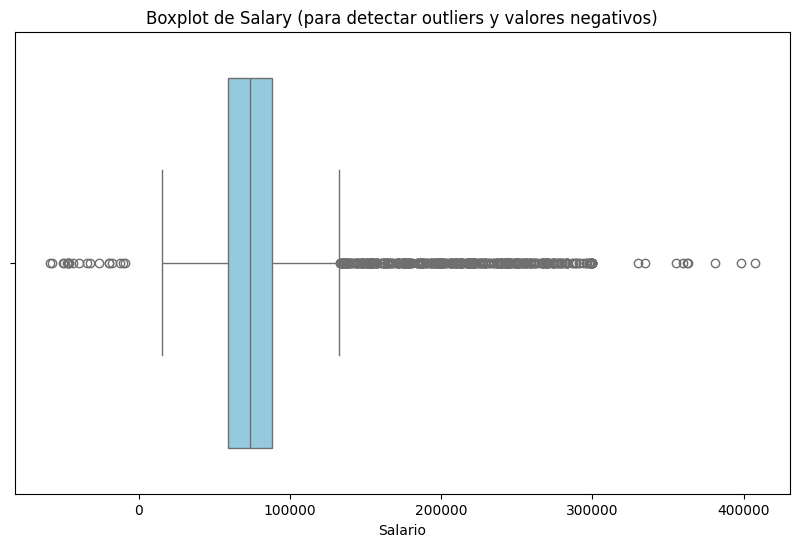

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_l["Salary"], color="skyblue")
plt.title("Boxplot de Salary (para detectar outliers y valores negativos)")
plt.xlabel("Salario")
plt.show()

Conclusiones gráfica:
- Confirmamos que los valores negativos son un error. Hay que pasarlos a positivo.
- Tenemos un gran número de outliers que están muy juntos. Esto es debido a que los valores negativos empujan la gráfica hacia la izquierda, al corregir los valores negativos se desplazará hacia la derecha y nos dará una visión mucho más realista.

In [35]:
#convertimos la columna a valores absolutos
df_l["Salary"] = df_l["Salary"].abs()

In [37]:
#recalculo los datos
df_l["Salary"].agg(['mean','median','min','max'])

mean       79359.340907
median     73455.000000
min         9081.000000
max       407228.000000
Name: Salary, dtype: float64

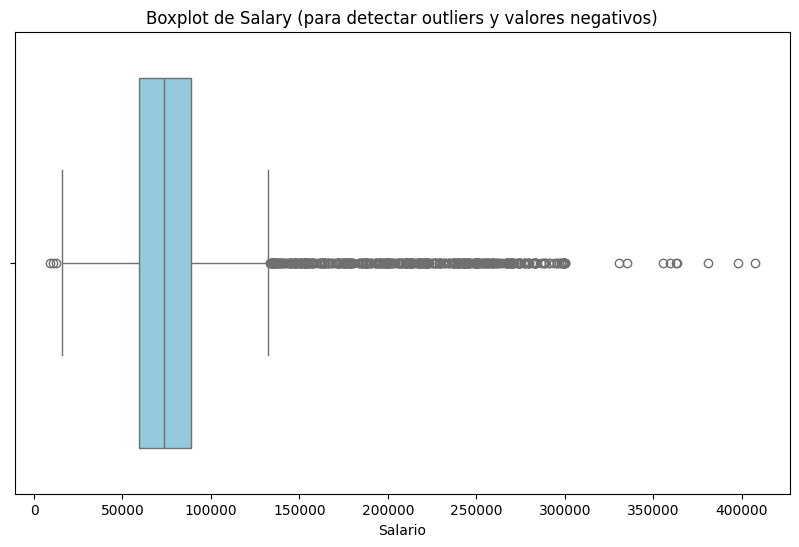

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_l["Salary"], color="skyblue")
plt.title("Boxplot de Salary (para detectar outliers y valores negativos)")
plt.xlabel("Salario")
plt.show()

Sigue habiendo un gran número de outliers, se debe a que hay personas con sueldos muy altos. Vamos a realizar otras comprobaciones.

CLV: Valor estimado que el cliente aporta a la empresa
- **Enrollment Type:** Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
**Loyalty Card:** Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.


In [45]:
df_l.groupby(["Enrollment Type", "CLV"]).mean("Salary")

Loyalty Number   Salary  Enrollment Year  \
Enrollment Type CLV                                                  
2018 Promotion  2004.35         142290.0      NaN           2018.0   
                2121.65         928438.0      NaN           2018.0   
                2150.91         290356.0      NaN           2018.0   
                2179.43         238342.0      NaN           2018.0   
                2242.23         688139.0      NaN           2018.0   
...                                  ...      ...              ...   
Standard        66025.75        337561.5  56406.0           2016.0   
                67907.27        759574.5  89210.0           2013.0   
                73225.96        767366.0  60845.0           2017.0   
                74228.52        810166.0      NaN           2014.5   
                83325.38        652627.0  75049.0           2015.0   

                          Enrollment Month  Cancellation Year  \
Enrollment Type CLV                                             
2018 Promotion  2004.35                3.0                NaN   
                2121.65                2.0                NaN   
                2150.91                2.0             2018.0   
                2179.43                2.0                NaN   
                2242.23                4.0                NaN   
...                                    ...                ...   
Standard        66025.75               5.5                NaN   
                67907.27               8.0                NaN   
                73225.96               3.0             2017.0   
                74228.52               6.0             2016.0   
                83325.38              12.0             2016.0   

                          Cancellation Month  
Enrollment Type CLV                           
2018 Promotion  2004.35                  NaN  
                2121.65                  NaN  
                2150.91                 10.0  
                2179.43                  NaN  
                2242.23                  NaN  
...                                      ...  
Standard        66025.75                 NaN  
                67907.27                 NaN  
                73225.96                11.0  
                74228.52                 4.0  
                83325.38                 8.0  

[8798 rows x 6 columns]

In [46]:
df_l["Enrollment Type"].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [49]:
df_l["Loyalty Card"].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

Quiero comprobar si puedo rellenar los valores nulos en salario, basándome en otras columnas como "Loyalty Card". 

C:\Users\elepf\AppData\Local\Temp\ipykernel_11048\513530388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


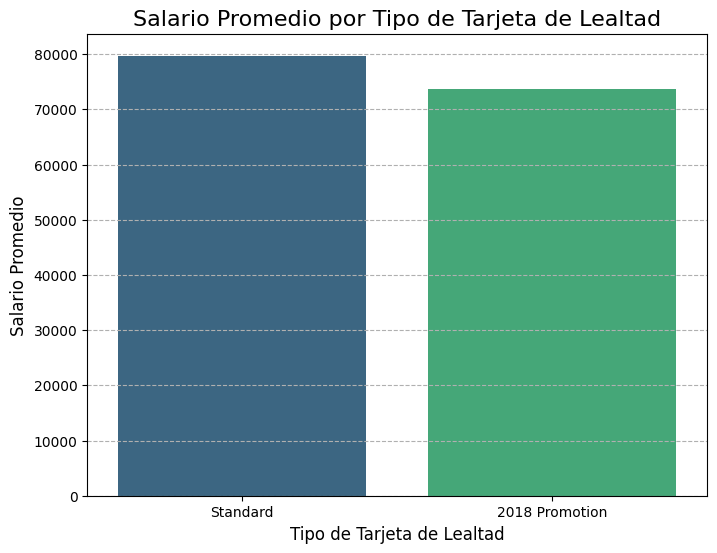

In [ ]:
plt.figure(figsize=(8, 6)) 

sns.barplot(
    data=df_l,         
    x="Enrollment Type",  
    y="Salary",        
    palette="viridis",
    errorbar=None  
)

plt.title("Salario Promedio por Tipo de Tarjeta de Lealtad", fontsize=16)
plt.xlabel("Tipo de inscripción al programa de lealtad", fontsize=12)
plt.ylabel("Salario Promedio", fontsize=12)

# Muestra el gráfico
plt.grid(axis='y', linestyle='--') 
plt.show();

In [62]:
df_l.groupby("Enrollment Type")["Salary"].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Enrollment Type,,,,
2018 Promotion,73615.763984,65088.0,407228.0,9081.0
Standard,79717.155108,73905.0,299953.0,39000.0


Existe diferencia entre los dos tipos de tarjeta de lealtad a nivel salarial. Dentro de eso, resulta más exacto imputar por la mediana (Esto se debe a la fuerte frecuencia de outliers). 
Voy a hacer comprobaciones más exactas: 

In [ ]:
#  Calcular la Mediana Agrupando por Educación y Tipo de Matrícula:
# Esto agrupará las filas por la combinación única de Education y Enrollment Type.
medianas_doble_grupo = df_l.groupby(["Education", "Enrollment Type"])["Salary"].median()

print("Medianas de Salario Agrupadas por Educación y Tipo de Matrícula (para Imputación):")
print(medianas_doble_grupo)
print("-" * 40)


Medianas de Salario Agrupadas por Educación y Tipo de Matrícula (para Imputación):
Education             Enrollment Type
Bachelor              2018 Promotion      63127.0
                      Standard            72583.0
College               2018 Promotion          NaN
                      Standard                NaN
Doctor                2018 Promotion     266491.5
                      Standard           176336.5
High School or Below  2018 Promotion      64469.0
                      Standard            61692.5
Master                2018 Promotion     103242.0
                      Standard           105487.0
Name: Salary, dtype: float64
----------------------------------------


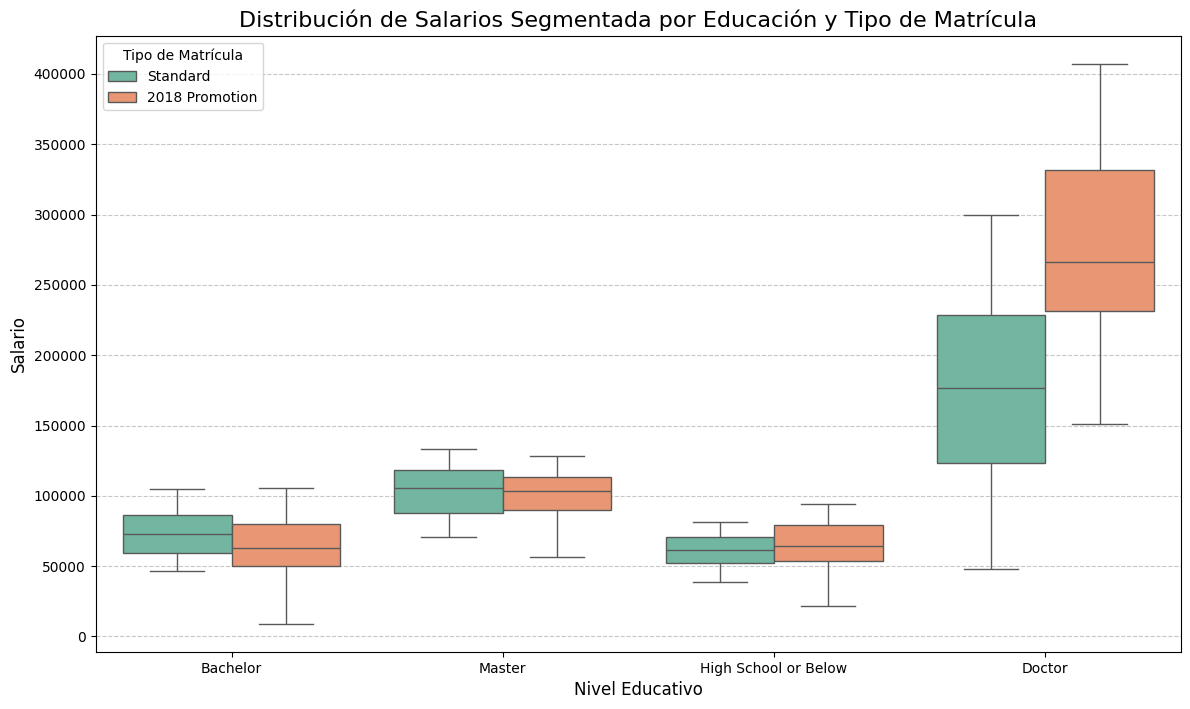

In [ ]:
#GRAFICA AGRUPANDO EDUCADIÓN Y TIPO DE MATRÍCULA PARA VER SALARIO

plt.figure(figsize=(14, 8)) 

sns.boxplot(
    data=df_l.dropna(subset=['Salary']),  
    x="Education",                        
    y="Salary",                          
    hue="Enrollment Type",                
    palette="Set2")

# Añade título y etiquetas
plt.title("Distribución de Salarios Segmentada por Educación y Tipo de Matrícula", fontsize=16)
plt.xlabel("Nivel Educativo", fontsize=12)
plt.ylabel("Salario", fontsize=12)
plt.legend(title="Tipo de Matrícula") # Muestra la leyenda para los colores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

En la gráfica vemos que el nivel educativo no está tan relacionado con el tipo de matrícula, pero SÍ vemos notables diferencias con el nivel educativo. Por lo tanto, vamos a realizar una gráfica que muestre las direncias salariales con respecto al nivel educativo 

C:\Users\elepf\AppData\Local\Temp\ipykernel_11048\2325509822.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


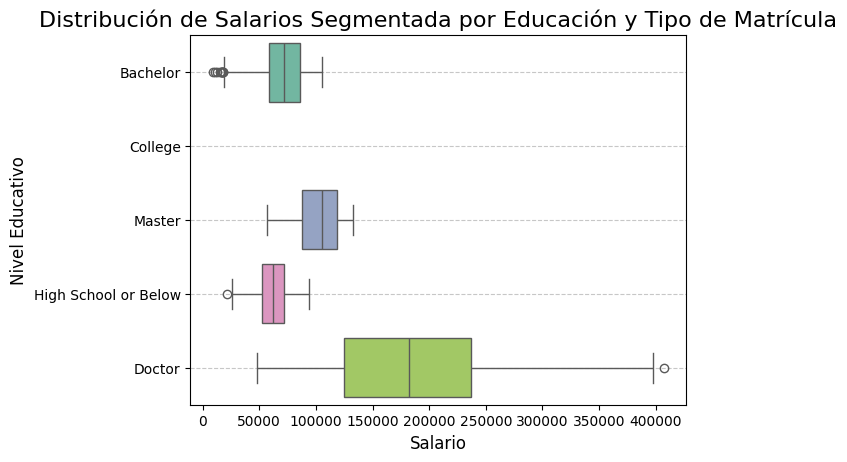

In [70]:
sns.boxplot(
    data=df_l,  
    x="Salary",                       
    y="Education",                                       
    palette="Set2",
    legend=False                                            
)

# Añade título y etiquetas
plt.title("Distribución de Salarios Segmentada por Educación y Tipo de Matrícula", fontsize=16)
plt.xlabel("Salario", fontsize=12)
plt.ylabel("Nivel Educativo", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Imputación de nulos: 
Teniendo en cuenta estas diferencias. Vamos a agrupar los nulos de "Salary" por nivel educativo, y vamos a cambiarlos por la mediana de estos valores.